# Decision Tree

## 基础知识
### 信息熵
**随机变量的混乱程度（越混乱熵值越高）**
**公式**
$$H(x)=-\sum^{n}_{i=1}P_i*\log(P_i)$$
随机事件越容易发生，概率（$P_i \rightarrow  1$）越大，$\log(P_i)\rightarrow0$
当P=0或P=1时，H(P)=0,随机变量完全没有不确定性
当P=0.5时H(P)=1,此时不确定性最大
### 信息增益
**不确定性减少的程度：**
分类前集合的信息熵-分类后各个集合的信息熵的加权平均数

## 决策树算法
#### ID3: 信息增益
#### C4.5：信息增益率（解决ID3问题，考虑自身熵）
#### CART：使用GINI系数来当做衡量标准
**GINI系数：**
$$Gini(p)=\sum^{n}_{i=1}p_i(1-p_i)=1-\sum^{n}_{i=1}p^2_i$$

## 决策树剪枝
### 原因
决策树过拟合风险大。理论上可以完全分得开数据（每个叶节点只有一个数据）
### 剪枝策略

**预剪枝：** 限制深度、叶子节点个数、叶子节点样本数、信息增量等<br>
**后剪枝：** 通过一定的衡量标准
$$C_\alpha(T)=C(T)+\alpha·|T_{leaf}|$$
$C_\alpha(T)$: 代价函数<br>
$C(T)$: 叶节点中样本数*GINI系数(信息熵)<br>
$T_{leaf}$：叶节点个数<br>
计算每个节点的代价值，然后计算由此节点分出的叶节点的代价值，比较代价以确定是否划分此节点。<br>

### 决策树Demo

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [77]:
from sklearn.datasets.california_housing import fetch_california_housing
house = fetch_california_housing()
data = pd.DataFrame(house.data, columns=house.feature_names)
data['price'] = house.target

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0: len(data.columns) - 1],data['price'].values.ravel(),test_size=0.2)



### 用sklearn创建决策树

In [97]:
from sklearn.tree import DecisionTreeRegressor
tc = tree.DecisionTreeRegressor(max_depth=2)
tc.fit(x_train[['Latitude','Longitude']], y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### graphviz
打印决策树

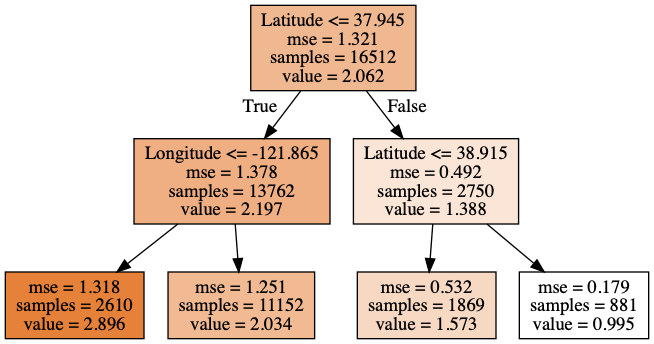

In [100]:
dot_data = tree.export_graphviz(
    tc,
    feature_names=house.feature_names[6:8],
    out_file=None,
    filled=True
    )

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.get_nodes()[7].set_fillcolor("#FFFFFF")
from IPython.display import Image
Image(graph.create_png())

### 决策树模型评估